# Natural Language Processing Project

### About Yelp
Yelp Inc. is an American company that develops the Yelp.com website and the Yelp mobile app, which publish crowd-sourced reviews about businesses. It operates a social networking, user review, and local search web site of the same name

Yelp connects people with great local businesses.  It reviews of almost every type of local business, from restaurants, boutiques and salons to dentists, mechanics, plumbers and more.

### Dataset Description

The data is a detailed dump of Yelp reviews, businesses, users, and checkins for the Phoenix, AZ metropolitan area. yelp_training_set.zip and yelp_training_set_mac.zip have the same files in them. You only need to download one; both are 
provided for compatibility.

Goal:Classify Yelp Reviews into 1 star or 5 star categories based off the text content in the reviews

Data Source: Yelp Review Data Set from Kaggle.

Each observation in this dataset is a review of a particular business by a particular user.

The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.

The "cool" column is the number of "cool" votes this review received from other Yelp users.

All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.

The "useful" and "funny" columns are similar to the "cool" column.


# Import tools

In [5]:
#Import basic tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

#Import NLP tools
import nltk
import gensim 
import string
import re

#preprocessing tools
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import export_text, plot_tree,export_graphviz

#models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

#models performance evaulation tools
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

from sklearn import set_config
set_config(display='diagram')

In [3]:
#Down load important tools from nltk
#nltk.download()
nltk.download_shell()


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml
NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] bcp47............... BCP-47 Language Tags
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Cor

KeyboardInterrupt: Interrupted by user

In [78]:
#important tools from nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')  #for part of speech tagging (pos tagging)
nltk.download('maxent_ne_chunker')            #for named entities 
nltk.download('words') 
nltk.download('punkt')
nltk.download('stopwords')
#Tokenization and Text Normalization tools
from nltk.tokenize import word_tokenize,sent_tokenize,TreebankWordTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,SnowballStemmer
from nltk.stem import WordNetLemmatizer
#feature Extraction tools
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer,TfidfVectorizer
from gensim.models import word2vec,keyedvectors

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kafub\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\kafub\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kafub\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kafub\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [63]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

### The Data

Read the yelp.csv file and set it as a dataframe called yelp.

In [7]:
yelp_df=pd.read_csv('yelp.csv')
yelp_df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [10]:
#Graping one whole review text
yelp_df['text'][0]

'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!'

# Exploratory Data Analysis

Let's check out some of the stats with some plots and the built-in methods in pandas!

In [11]:
yelp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [12]:
yelp_df.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


The minimum star is 1 and the maximum star get by the users is 5.

In [13]:
#"text length" which is the number of words in the text column.
yelp_df['text_length']=yelp_df['text'].apply(len)
yelp_df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text_length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


The first review has 889 characters, second 1345 and so on.

# Data Visualization
Let's visualize this!



<AxesSubplot: ylabel='Frequency'>

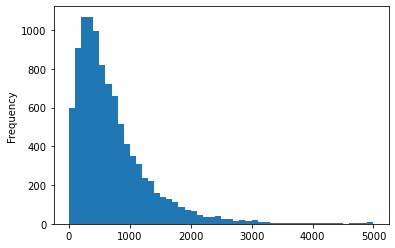

In [19]:
#Plot the histogram of the text length using pandas builtin libraries
yelp_df['text_length'].plot(kind='hist',bins=50)

The text length skewed to the right. The mean,median, and mode are not the same.

In [20]:
# 
yelp_df['text_length'].describe()

count    10000.000000
mean       710.738700
std        617.399827
min          1.000000
25%        294.000000
50%        541.500000
75%        930.000000
max       4997.000000
Name: text_length, dtype: float64

The minimum text review has 710.738700 characters and maximum text review has 4997.000000 characters

In [26]:
#The miminum text review characters
yelp_df[yelp_df['text_length']==710]

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text_length
980,WNy1uzcmm_UHmTyR--o5IA,2010-02-24,rai0XuKom2GYz3qQ8lN9LA,5,I went here for lunch a couple of weeks ago wi...,review,Q4c-HD4iycZGrAnNK6d0tw,1,1,0,710
1172,lXUaypwLG_rIU4qnpBmF-A,2012-08-31,vz4xCCersFRfDXl2qhvAWA,5,"Yes, it's on the Northwest side and its tucked...",review,uBp2Jmip2qXQ0iWHUDY9sQ,3,3,2,710
1866,yb17xHvhDJthJGS10uhFeQ,2009-07-01,GMm0xFMRArZX7lztrWPG8Q,4,One of my new favorite neighborhood bars! \n\n...,review,hq0WUfau1Mh3GyHn8oVdNQ,4,4,1,710
3876,4r9-iKOagzn5oUvPE9Bz4Q,2011-12-07,ny6Jlfysm6VTYgqmm6l3PA,5,Fantastic venue! Province really adds a touch ...,review,nSLrExcVVphiNzvSf5H7vA,1,1,1,710
5134,zp713qNhx8d9KCJJnrw1xA,2011-08-07,CgChEdEM0NYLA8M-oDzaCw,4,I love the artwork. Its a tiny little restaur...,review,d0wJVf7Gv7v1B-HHYhxZtQ,1,1,0,710
6736,eClo8BPc90-YdBfuvRcpkg,2008-03-17,wehQdhTXfnLGnX2QUP_6mg,3,The best place to skip work and goofy golf in ...,review,8VbK8pAotgfI0bnGfqPykg,10,10,6,710
8401,hZRLGfRrZTo9up2P-0aAHg,2010-07-09,zWhVRsQ80-6EVlT4EIU6MQ,4,So far the only thing I have eaten at Verde th...,review,3VIRjR2V29TOaI9u64hMig,1,1,0,710
9783,Re0Xw-AYkn6NK7QRk3kPEg,2009-02-18,vVaUMlzYJPc0pWV46XT8YA,3,"For such a small space, Stinkweeds definitely ...",review,FxxYCRPcpd__yhRRmmtyMQ,0,0,0,710


There are 8 datapoints that have a minimum text reviews

In [27]:
#The maximum text review characters
yelp_df[yelp_df['text_length']==4997]

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text_length
55,FCcFT610nQBVcRdY-devQA,2012-01-14,6jRs2P6zTYMn36fVnCu1Zw,4,"In our continuing quest to identify cool, loca...",review,40aklZ2SQPKnlTPZdvAqww,0,1,0,4997


There is only one datapoints that have a mmaximum text reviews

In [32]:
yelp_df[yelp_df['text_length']==4997]['text'][55]

'In our continuing quest to identify cool, locally owned places to eat and/or drink, Caroline and I auditioned Vintage 95 last night. \n\nBefore I go further, understand that whenever I go out for eats or drinks, I have  in  mind a Platonic Ideal of the Bar/Pub/Eatery I most want to frequent. I\'m on a constant quest to find that  Ideal expressed in Real Life. \n\nVintage 95 isn\'t quite there, but it\'s damn close. If I ever give something Five Stars, you\'ll know it has pegged my Platonic Ideal. Anyway...\n\nThe plan last night was for drinks. No plans for food, just Adult Beverages and warm conversation. But it turned into more.\n\nThe location in downtown Chandler is terrific for us. The owners have created a very fine visual experience - leather, stone, dark woods, good lighting. And they don\'t have the music turned up so loud that you CANNOT HAVE A CONVERSATION. This is one of my pet peeves. If I want to stare at people move their mouths while enduring an aural assault, I\'ll st

This is the entire text 

<Figure size 720x576 with 0 Axes>

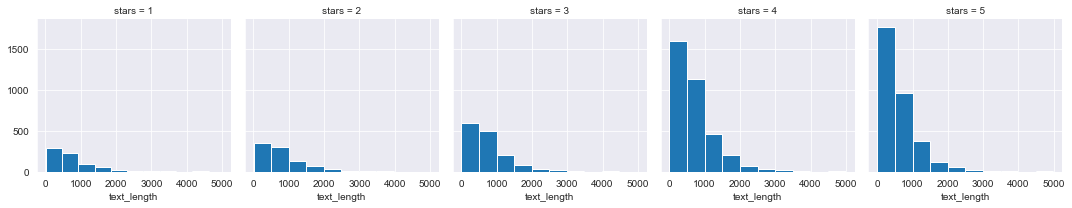

In [47]:
#FacetGrid from the seaborn library to create a grid of 5 histograms of text length based off of the star ratings.
#style are white, dark, whitegrid, darkgrid, ticks
sns.set_style('darkgrid')
fig=plt.figure(figsize=(10,8))
fg=sns.FacetGrid(data=yelp_df,col='stars')
fg.map(plt.hist,'text_length')

The Facetgrid gives an entire stars histogram. star 4 and s star 5 get higher number of rewiew

<AxesSubplot: xlabel='stars', ylabel='text_length'>

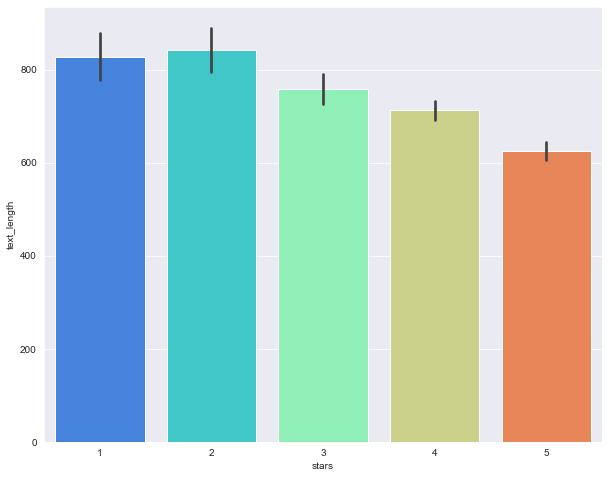

In [51]:
#The seabon barplot of the stars
sns.set_style('darkgrid')
fig=plt.figure(figsize=(10,8))
sns.barplot(data=yelp_df,x='stars',y='text_length',palette='rainbow')

Stars 1 and 2 has many text line.

<AxesSubplot: xlabel='stars', ylabel='text_length'>

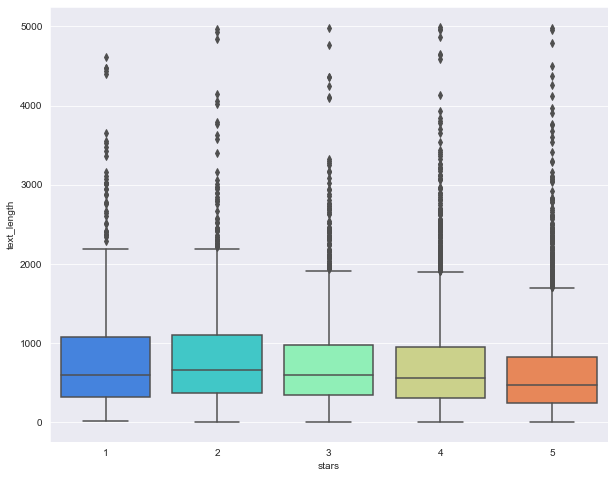

In [52]:
#The seabon boxplot of the stars
sns.set_style('darkgrid')
fig=plt.figure(figsize=(10,8))
sns.boxplot(data=yelp_df,x='stars',y='text_length',palette='rainbow')

Fron the above boxplot isthe text length for each stars, stars 1 and 2 have many text line

<AxesSubplot: xlabel='stars', ylabel='count'>

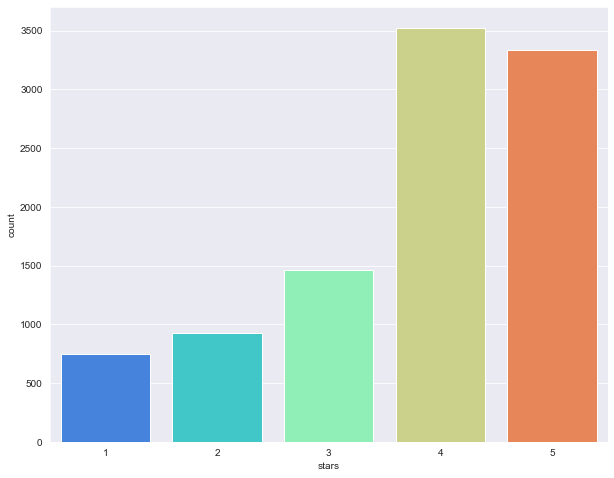

In [54]:
#The seabon countplot of the stars
sns.set_style('darkgrid')
fig=plt.figure(figsize=(10,8))
sns.countplot(data=yelp_df,x='stars',palette='rainbow')

This is a countplot of text length for each stars. 

In [57]:
stars=yelp_df.groupby('stars').mean()
stars

,cool,useful,funny,text_length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [58]:
corr=yelp_df.corr()
corr

,stars,cool,useful,funny,text_length
stars,1.000000,0.052555,-0.023479,-0.061306,-0.114674
cool,0.052555,1.000000,0.887102,0.764342,0.241451
useful,-0.023479,0.887102,1.000000,0.723406,0.293975
funny,-0.061306,0.764342,0.723406,1.000000,0.251760
text_length,-0.114674,0.241451,0.293975,0.251760,1.000000


<AxesSubplot: >

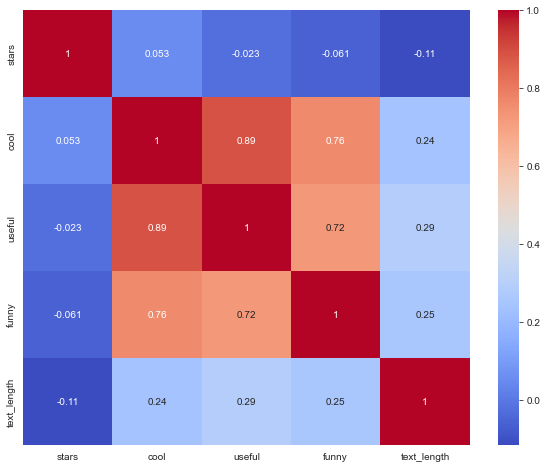

In [59]:
#The seabon heatmap of the stars
sns.set_style('darkgrid')
fig=plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')

# NLP Classification Task

Text preprocessing: As a pre-processing step, perform both stemming and lemmatizing to normalize your text before classifying. For each technique use both the CountVectorizer and TfidifVectorizer and use options for stop words and max features to prepare the text data for your estimator.

Classification: Once you have prepared the text data with stemming lemmatizing techniques, consider LogisticRegression, DecisionTreeClassifier, and MultinomialNB as classification algorithms for the data. Compare their performance in terms of accuracy and speed.

In [65]:
yelp_class = yelp_df[(yelp_df['stars'] == 1) | (yelp_df['stars']==5)]
yelp_class['stars'].value_counts()

5    3337
1     749
Name: stars, dtype: int64

In [66]:
yelp_class.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4086 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  4086 non-null   object
 1   date         4086 non-null   object
 2   review_id    4086 non-null   object
 3   stars        4086 non-null   int64 
 4   text         4086 non-null   object
 5   type         4086 non-null   object
 6   user_id      4086 non-null   object
 7   cool         4086 non-null   int64 
 8   useful       4086 non-null   int64 
 9   funny        4086 non-null   int64 
 10  text_length  4086 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 383.1+ KB


### Text preprocessing:


In [92]:
#Instanciate the stemmer and lematizer
tokenizer=TreebankWordTokenizer()
ps=PorterStemmer()
WordNetL=WordNetLemmatizer()

In [171]:
def text_preprocess(text):
    """
    Takes in a string of text, then performs the following:
    1.Remove all punctuation
    3.apply lower case
    4.split the text
    5. Remove all stopwords
    6.apply lemmatizing
    7. Returns a list of the cleaned text
    """
    no_punc = [i for i in text if i not in string.punctuation]
    no_punc = ''.join(no_punc)
    for i in no_punc:
        new_text = no_punc.rstrip('\n\n')
    removestopwords=[i for i in new_text.split() if i not in stopwords.words('english')]
    wordlower=[lower.lower() for lower in removestopwords]
    cleaned_data=[WordNetL.lemmatize(word) for word in wordlower]
    return cleaned_data

In [172]:
yelp_df['text'][0]

'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!'

In [173]:
yelp_df['text'].head().apply(text_preprocess)

0    [my, wife, took, birthday, breakfast, excellen...
1    [i, idea, people, give, bad, review, place, it...
2    [love, gyro, plate, rice, good, i, also, dig, ...
3    [rosie, dakota, i, love, chaparral, dog, park,...
4    [general, manager, scott, petello, good, egg, ...
Name: text, dtype: object

### Prepare the data

In [176]:
X =yelp_df['text']
y=yelp_df['stars']

In [177]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### Creating a Data Pipeline

In [180]:
#Pipeline applying lemmatization
pipeline_lemma_bow = Pipeline([
    ('Bow', CountVectorizer(analyzer=text_preprocess)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB())])  # train on TF-IDF vectors w/ Naive Bayes classifier

pipeline_lemma_tfidfvec = Pipeline([
    ('tfidf',TfidfVectorizer(analyzer=text_preprocess)),  
    ('classifier', MultinomialNB())]) 

In [181]:
pipeline_lemma_bow.fit(X_train,y_train)
pre_lemma_bow = pipeline_lemma_bow.predict(X_test)
print(classification_report(pre_lemma_bow,y_test))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.88      0.39      0.54      2423
           5       0.36      0.62      0.46       577

    accuracy                           0.44      3000
   macro avg       0.25      0.20      0.20      3000
weighted avg       0.78      0.44      0.53      3000



C:\Users\kafub\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

C:\Users\kafub\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

C:\Users\kafub\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



In [182]:
pipeline_lemma_tfidfvec.fit(X_train,y_train)
pre_lemma_tfidfvec = pipeline_lemma_tfidfvec.predict(X_test)
print(classification_report(pre_lemma_tfidfvec,y_test))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.88      0.39      0.54      2423
           5       0.36      0.62      0.46       577

    accuracy                           0.44      3000
   macro avg       0.25      0.20      0.20      3000
weighted avg       0.78      0.44      0.53      3000



C:\Users\kafub\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

C:\Users\kafub\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

C:\Users\kafub\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

